In [1]:
import matplotlib as mpl
COLOR = 'white'
mpl.rcParams['text.color'] = COLOR
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from scipy.stats import variation
from math import isnan

from scipy.cluster.hierarchy import dendrogram,linkage


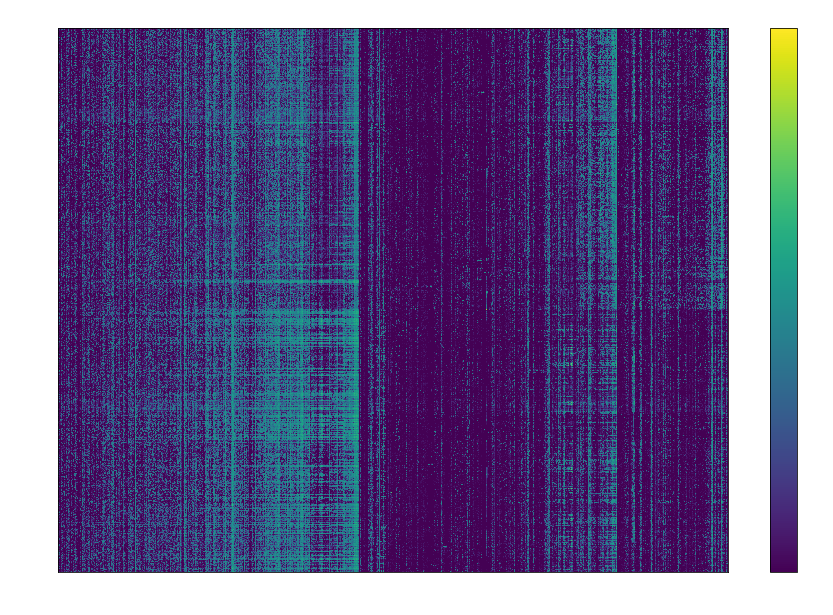

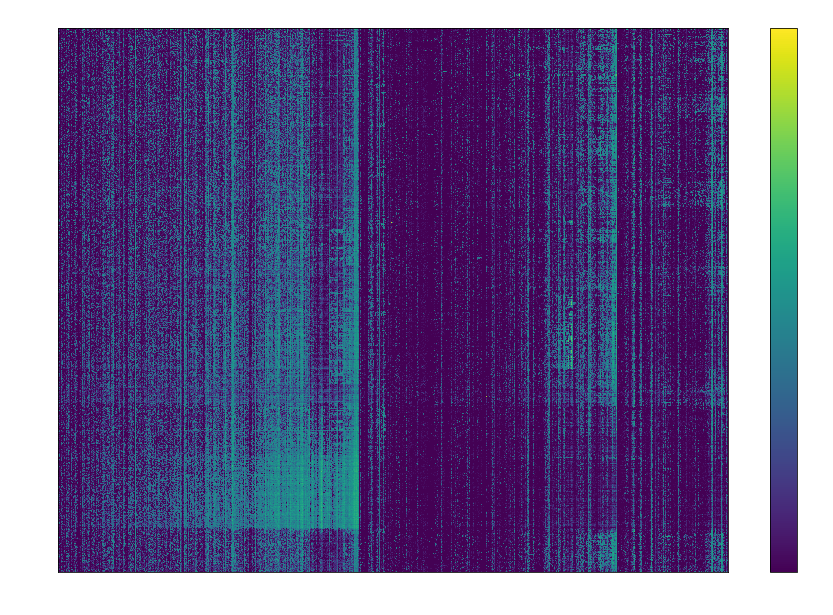

(1656, 4773)
(4773,)


In [2]:
# counts = np.loadtxt('/Users/boris/taylor/vision/rust_prototype/raw_data/counts.txt')
raw_counts = np.loadtxt('/Users/boris/taylor/vision/python_prototype/raw_data/vision_sc/coordinates_gene_counts_flow_cytometry.txt',dtype='str')
cell_names = raw_counts[1:,0]

raw_cell_ids = np.loadtxt('/Users/boris/taylor/vision/python_prototype/raw_data/vision_sc/all_cell_types.txt',dtype='str')
cell_id_header = raw_cell_ids[0,1:]
cell_id_names = raw_cell_ids[1:,0]

for i,cell in enumerate(cell_names):
    if cell[:6] == 'LT.HSC':
        cell_names[i] = 'LT-HSC' + cell_names[i][6:]

cell_id_name_dict = {n:i+1 for i,n in enumerate(cell_id_names)}

cell_ids = np.array([raw_cell_ids[cell_id_name_dict[cell],1:].astype(dtype=bool) for cell in cell_names])

counts = raw_counts[1:,27:].astype(dtype=float)

header = np.loadtxt('/Users/boris/taylor/vision/rust_prototype/forest_prot/header.txt',dtype=str)
header[header=='error'] = [h+str(i) for i,h in enumerate(header[header=='error'])]

feature_sort = dendrogram(linkage(counts.T,metric='correlation',method='average'),no_plot=True)['leaves']

# counts = counts[cell_sort].T[feature_sort].T
counts = counts.T[feature_sort].T
header = header[feature_sort]

plt.figure(figsize=(15,10))
plt.title("Cell x Gene Expression Unsorted",fontsize=20)
plt.imshow(counts,aspect='auto')
plt.xlabel("Genes",fontsize=15)
plt.ylabel("Cells",fontsize=15)
plt.colorbar()
plt.show()

cell_sort = dendrogram(linkage(counts,metric='cos',method='average'),no_plot=True)['leaves']

plt.figure(figsize=(15,10))
plt.title("Cell x Gene Expression, Agglomerative, Mouse Blood Progenitor Cells",fontsize=20)
plt.imshow(counts[cell_sort],aspect='auto')
plt.xlabel("Genes",fontsize=15)
plt.ylabel("Cells",fontsize=15)
plt.colorbar()
plt.show()


print(counts.shape)
print(header.shape)

# Basic PCA Analysis of the Blood

In [3]:
from sklearn.decomposition import PCA

model = PCA()

pca_coordinates = model.fit_transform(counts)



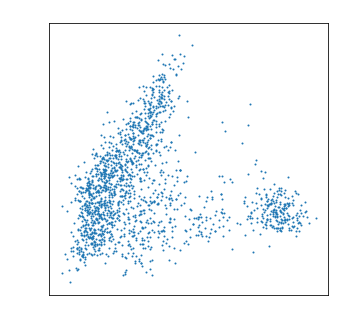

In [15]:
plt.figure(figsize=(5,5))
plt.title("Decomposition of Mouse Blood Data by PCA")
plt.scatter(pca_coordinates[:,0],pca_coordinates[:,1],s=1)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

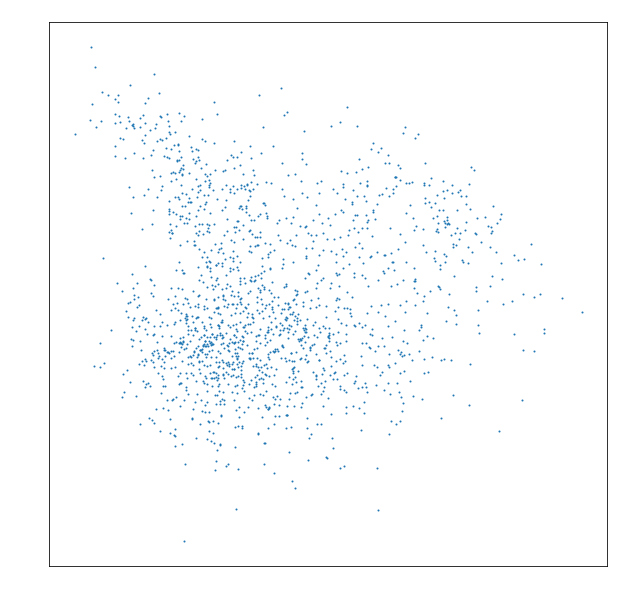

In [5]:
plt.figure(figsize=(10,10))
plt.title("Decomposition of Mouse Blood Data by PCA")
plt.scatter(pca_coordinates[:,1],pca_coordinates[:,2],s=1)
plt.xlabel('PC2')
plt.ylabel('PC3')
plt.show()

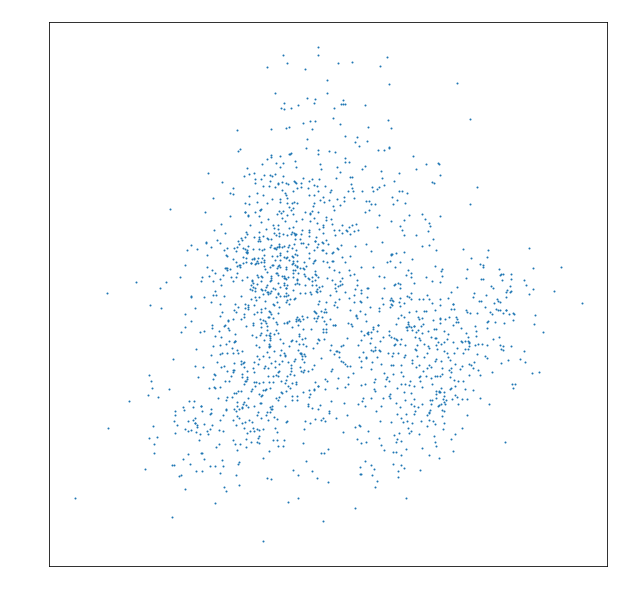

In [6]:
plt.figure(figsize=(10,10))
plt.title("Decomposition of Mouse Blood Data by PCA")
plt.scatter(pca_coordinates[:,2],pca_coordinates[:,3],s=1)
plt.xlabel('PC3')
plt.ylabel('PC4')
plt.show()

### Marking Cells by Known Type 

In [7]:
print(cell_id_header)



['LTHSC_narrow' 'LMPP_narrow' 'MPP_narrow' 'CMP_narrow' 'MEP_narrow'
 'GMP_narrow' 'MPP1_narrow' 'MPP2_narrow' 'MPP3_narrow' 'STHSC_narrow'
 'ESLAM_narrow' 'L-S+K+CD34-Flk2-CD48-CD150+_narrow' 'LTHSC_broad'
 'LMPP_broad' 'MPP_broad' 'CMP_broad' 'MEP_broad' 'GMP_broad' 'MPP1_broad'
 'MPP2_broad' 'MPP3_broad' 'STHSC_broad']


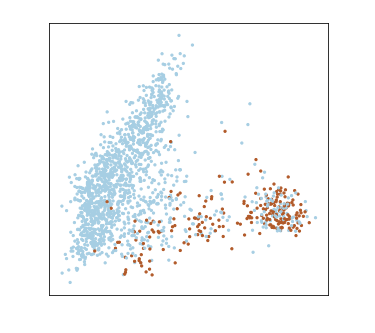

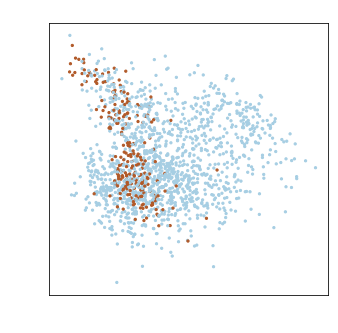

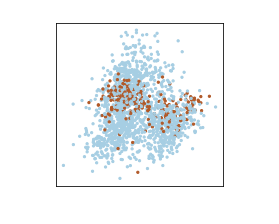

In [20]:
mep_index = list(cell_id_header).index('MEP_narrow')

plt.figure(figsize=(5,5))
plt.title("Decomposition of Mouse Blood Data by PCA, MEPs in brown")
plt.scatter(pca_coordinates[:,0],pca_coordinates[:,1],s=5,c=cell_ids[:,mep_index],cmap='Paired')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

plt.figure(figsize=(5,5))
plt.title("Decomposition of Mouse Blood Data by PCA")
plt.scatter(pca_coordinates[:,1],pca_coordinates[:,2],s=5,c=cell_ids[:,mep_index],cmap='Paired')
plt.xlabel('PC2')
plt.ylabel('PC3')
plt.show()

plt.figure(figsize=(3,3))
plt.title("Decomposition of Mouse Blood Data by PCA")
plt.scatter(pca_coordinates[:,2],pca_coordinates[:,3],s=5,c=cell_ids[:,mep_index],cmap='Paired')
plt.xlabel('PC3')
plt.ylabel('PC4')
plt.show()

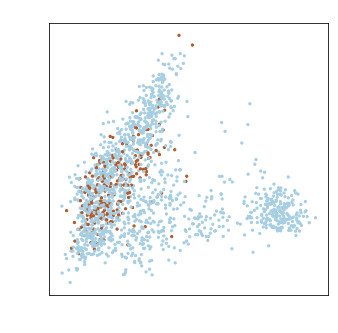

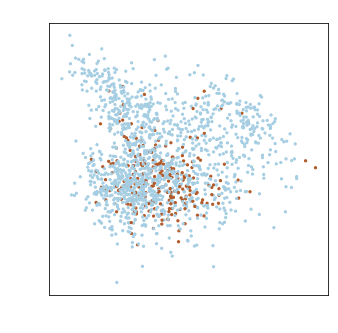

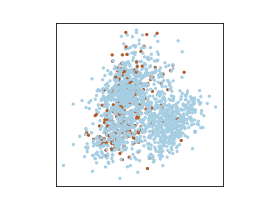

In [21]:
mpp_index = list(cell_id_header).index('MPP_narrow')

plt.figure(figsize=(5,5))
plt.title("Decomposition of Mouse Blood Data by PCA, MPPs Marked")
plt.scatter(pca_coordinates[:,0],pca_coordinates[:,1],s=5,c=cell_ids[:,mpp_index],cmap='Paired')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

plt.figure(figsize=(5,5))
plt.title("Decomposition of Mouse Blood Data by PCA, MPPs Marked")
plt.scatter(pca_coordinates[:,1],pca_coordinates[:,2],s=5,c=cell_ids[:,mpp_index],cmap='Paired')
plt.xlabel('PC2')
plt.ylabel('PC3')
plt.show()

plt.figure(figsize=(3,3))
plt.title("Decomposition of Mouse Blood Data by PCA")
plt.scatter(pca_coordinates[:,2],pca_coordinates[:,3],s=5,c=cell_ids[:,mpp_index],cmap='Paired')
plt.xlabel('PC3')
plt.ylabel('PC4')
plt.show()

<Figure size 432x288 with 0 Axes>

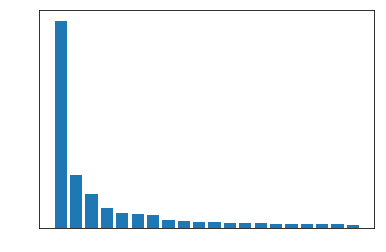

In [10]:
## We want to quickly plot out explained variance to get a feel for what we're working with here

plt.figure()
plt.figure("Explanatory power of basic PCs on Mouse Blood")
plt.bar(np.arange(20),model.explained_variance_[:20])
plt.show()

Let's take a look at the loadings of PC1 - 5

In [11]:
# from sklearn.manifold import TSNE

# tsne = TSNE()
# tc = tsne.fit_transform(counts)
# plt.figure()
# plt.scatter(tc[:,0],tc[:,1],c=cell_ids[:,4],s=1,cmap='Paired')
# plt.show()

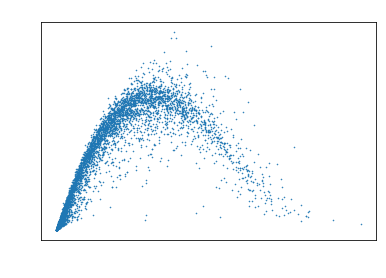

In [19]:
## BUT Here is where the problems begin. Let's map variance vs mean expression level for each gene:

mean_gene_expression = np.mean(counts,axis=0)
gene_variance = np.var(counts,axis=0)

plt.figure()
plt.title("Mouse Blood, Mean Expression Vs Variance per Gene")
plt.scatter(mean_gene_expression,gene_variance,s=.3)
plt.xlabel("Mean Gene Expression(Log TPM)")
plt.ylabel("Gene Variance")
plt.show()

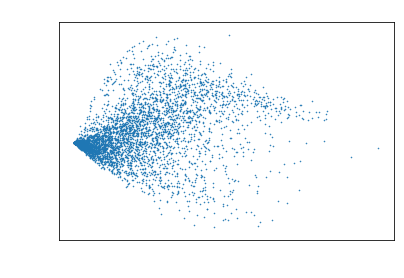

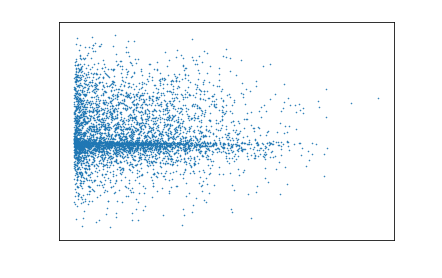

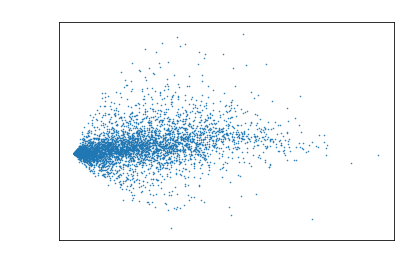

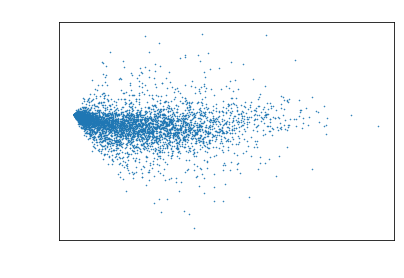

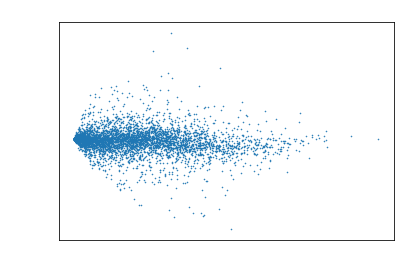

In [13]:
## Let's check if this is an issue for PC loadings

plt.figure()
plt.title("PC1 Loading vs Mean Expression Level")
plt.scatter(mean_gene_expression,model.components_[0],s=.3)
plt.xlabel("Mean expression level (Log TPM)")
plt.ylabel("PC1 Component Loading")
plt.show()

shuffle = np.arange(model.components_[0].shape[0])
np.random.shuffle(shuffle)

plt.figure()
plt.title("PC1 Loading vs Mean Expression Level (SHUFFLED, Negative Control)")
plt.scatter(mean_gene_expression,model.components_[0][shuffle],s=.3)
plt.xlabel("Mean expression level (Log TPM)")
plt.ylabel("PC1 Component Loading")
plt.show()

plt.figure()
plt.title("PC2 Loading vs Mean Expression Level")
plt.scatter(mean_gene_expression,model.components_[1],s=.3)
plt.xlabel("Mean expression level (Log TPM)")
plt.ylabel("PC2 Component Loading")
plt.show()

plt.figure()
plt.title("PC3 Loading vs Mean Expression Level")
plt.scatter(mean_gene_expression,model.components_[2],s=.3)
plt.xlabel("Mean expression level (Log TPM)")
plt.ylabel("PC3 Component Loading")
plt.show()

plt.figure()
plt.title("PC4 Loading vs Mean Expression Level")
plt.scatter(mean_gene_expression,model.components_[3],s=.3)
plt.xlabel("Mean expression level (Log TPM)")
plt.ylabel("PC4 Component Loading")
plt.show()

In [14]:
## Ah nuts. Well, let's check the loadings of the first few PCs anyway

In [25]:
for i in range(5):
    
    loadings = model.components_[i]
    top_50_loadings = np.argsort(np.abs(loadings)) > loadings.shape[0] - 50
    top_50_features = header[top_50_loadings]
    print(f"PC{i + 1} top loadings:")
    for f in top_50_features:
        print(f)

PC1 top loadings:
Zfp870
Ankfy1
Zranb1
Natd1
Pdlim5
Gtf3c3
Chst11
Stag2
Smim15
Shmt1
Clpx
Mtmr4
Coa5
Uqcrfs1
Clic4
Ubac1
Btnl10
Zufsp
Gm4673
Zfp82
Lef1
Rarres1
Ifi211
Gpr18
Itgam
Zswim4
Il10ra
Lyn
Tspan14
Ccdc136
Tshz3
Ndnf
Fmo5
Adora2a
Ak1
5730409E04Rik
Gm10419
Myo5c
Susd3
Traf1
Tns2
Fhl1
Bdh2
Sla2
Camk2d
Tsc22d3
Selenop
Mecom
Mfng
PC2 top loadings:
Clock
Dcun1d4
Zfp281
Pigv
Gskip
Osgin2
Szt2
Tmx3
Erlin1
Gk
Gtf2e1
Gsr
Crnkl1
Otud4
Wdr36
Ucp2
Orc5
Cnr2
Ell2
H2afx
Cox6b1
Pdzph1
Lrrc75a
Pcdhga7
Adam8
Arg1
Pard6b
Amot
Mrap
Papolg
Cecr2
Bst1
Fut1
Map10
Rgs14
Tha1
Rhbdl3
Ptger2
Idh1
Bpifc
Pak1
Rel
Zfp354a
Gm10605
3632451O06Rik
Btg2
Pde1c
Zbtb4
Zfp945
PC3 top loadings:
BC005561
Ahcyl1
Arl6ip1
Ckap5
4833439L19Rik
Ddost
Aldh18a1
Fam234b
Phf10
Sapcd2
Mdh2
Gna14
Gata2
Gm14379
Dll1
Trbj1-1
Id2
Cav1
Magee1
Abhd4
Tanc2
Phf11a
Serpina3f
BC026585
Lrrn4
Afdn
Slc16a2
Jam3
Vwf
Bdh2
Hcls1
Gbp2
Gm4759
Malat1
Rgs1
Rab38
Hlf
B230354K17Rik
Large2
Fut10
Slc22a18
Rab39b
Mrc2
Olfr658
Hook1
Adarb1
Apobec1
C53005

In [26]:
list(header).index("Klf1")

1885

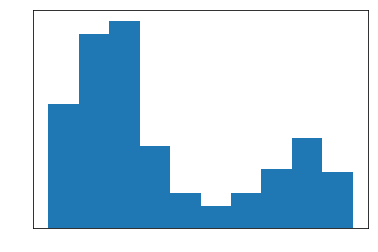

In [28]:
plt.figure()
plt.hist(counts[:,1885])
plt.show()

In [32]:
klf_var = np.var(counts[:,1885])
print(klf_var)

klf_high_mask = counts[:,1885] > 6
klf_low_mask = counts[:,1885] <= 6

print(np.sum(klf_high_mask))
print(np.sum(klf_low_mask))

klf_high_var = np.var(counts[:,1885][klf_high_mask])
klf_low_var = np.var(counts[:,1885][klf_low_mask])

print(klf_high_var)
print(klf_low_var)

12.120855921609863
474
1182
1.8398276373944609
1.883467107285372


In [45]:
# list(header).index("Lsp1")
header[500]

'Usp20'

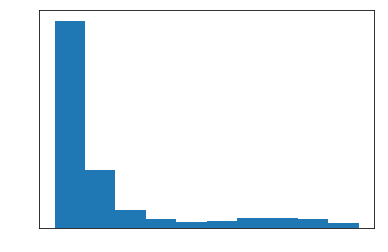

In [44]:
plt.figure()
plt.hist(counts[:,500])
plt.show()

In [48]:
usp20_var = np.var(counts[:,500])
print(usp20_var)
usp20_high = counts[:,500] > 4
usp20_low = counts[:,500] <= 4

usp20_high_var = np.var(counts[:,500][usp20_high])
usp20_low_var = np.var(counts[:,500][usp20_low])

print(usp20_high_var)
print(usp20_low_var)


5.203179106939583
1.9822701619494756
0.7611508399173063
